In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [90]:
path = "/Users/clairetang/Projects/1 SDG2000 2024/"
file_name = "SDG2000-Shareable-List-15012024.xlsx"
tab_name = "2. SDG2000"

In [91]:
df = pd.read_excel(path + file_name, sheet_name = tab_name, header = 0, index_col = 0)

In [92]:
df['Headquarters'] = df['Headquarters'].replace('United States', 'United States of America')

In [93]:
#import world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [94]:
def merge_world_companies_df(df, world):
    """
    count the number of company in one country and merge company counts with world map
    """
    company_counts = df['Headquarters'].value_counts().reset_index()
    gdf_companies = pd.merge(world, company_counts, how='left', left_on='name', right_on='Headquarters')
    return gdf_companies

In [98]:
def plot_map(gdf_companies, path, title, color):
    """
    plot the world map, set color bar, and save as image
    """
    # plot the choropleth map
    fig, ax = plt.subplots(figsize=(70, 40))
    ax.axis('off')
    ax.set_title(title, fontsize=75, fontfamily='Times New Roman', fontstyle='normal', weight='bold') 
    ax.annotate('Graphy made by Claire TANG' + '\n' + 'Source: World Benchmarking Alliance', fontsize=40, fontfamily='Times New Roman', xy = (1, 1), xycoords='axes fraction')
    
    vmin = gdf_companies["count"].min()
    vmax = gdf_companies["count"].max()
    
    gdf_companies.fillna(0).plot(ax=ax, column='count', cmap=color, edgecolor='black', linewidth=0.5, legend=False)
    
    # add colorbar
    cax = fig.add_axes([0.25, 0.1, 0.5, 0.03])
    sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbr = fig.colorbar(sm, cax=cax, orientation='horizontal')
    cbr.ax.tick_params(labelsize=30)
    cbr.set_label("Company Count", fontsize=40, fontfamily='Times New Roman')
    
    # set the color of the border
    fig.patch.set_edgecolor('black')  
    fig.patch.set_linewidth(1.5)  

    # save as image
    plt.savefig(path + title + ".png")
    # Display the map
    plt.show()

In [96]:
# column headers and colors to use
column_dict =  [['Food and Agriculture Transformation', 'YlGn'],
                ['Decarbonisation and Energy Transformation', 'GnBu'],
                ['Nature and Biodiversity Transformation', 'BuGn'],
                ['Digital Transformation','RdPu'],
                ['Financial Transformation', 'YlGnBu'],
                ['Urban Transformation','YlOrRd'],
                ['Social Transformation','YlOrBr']]

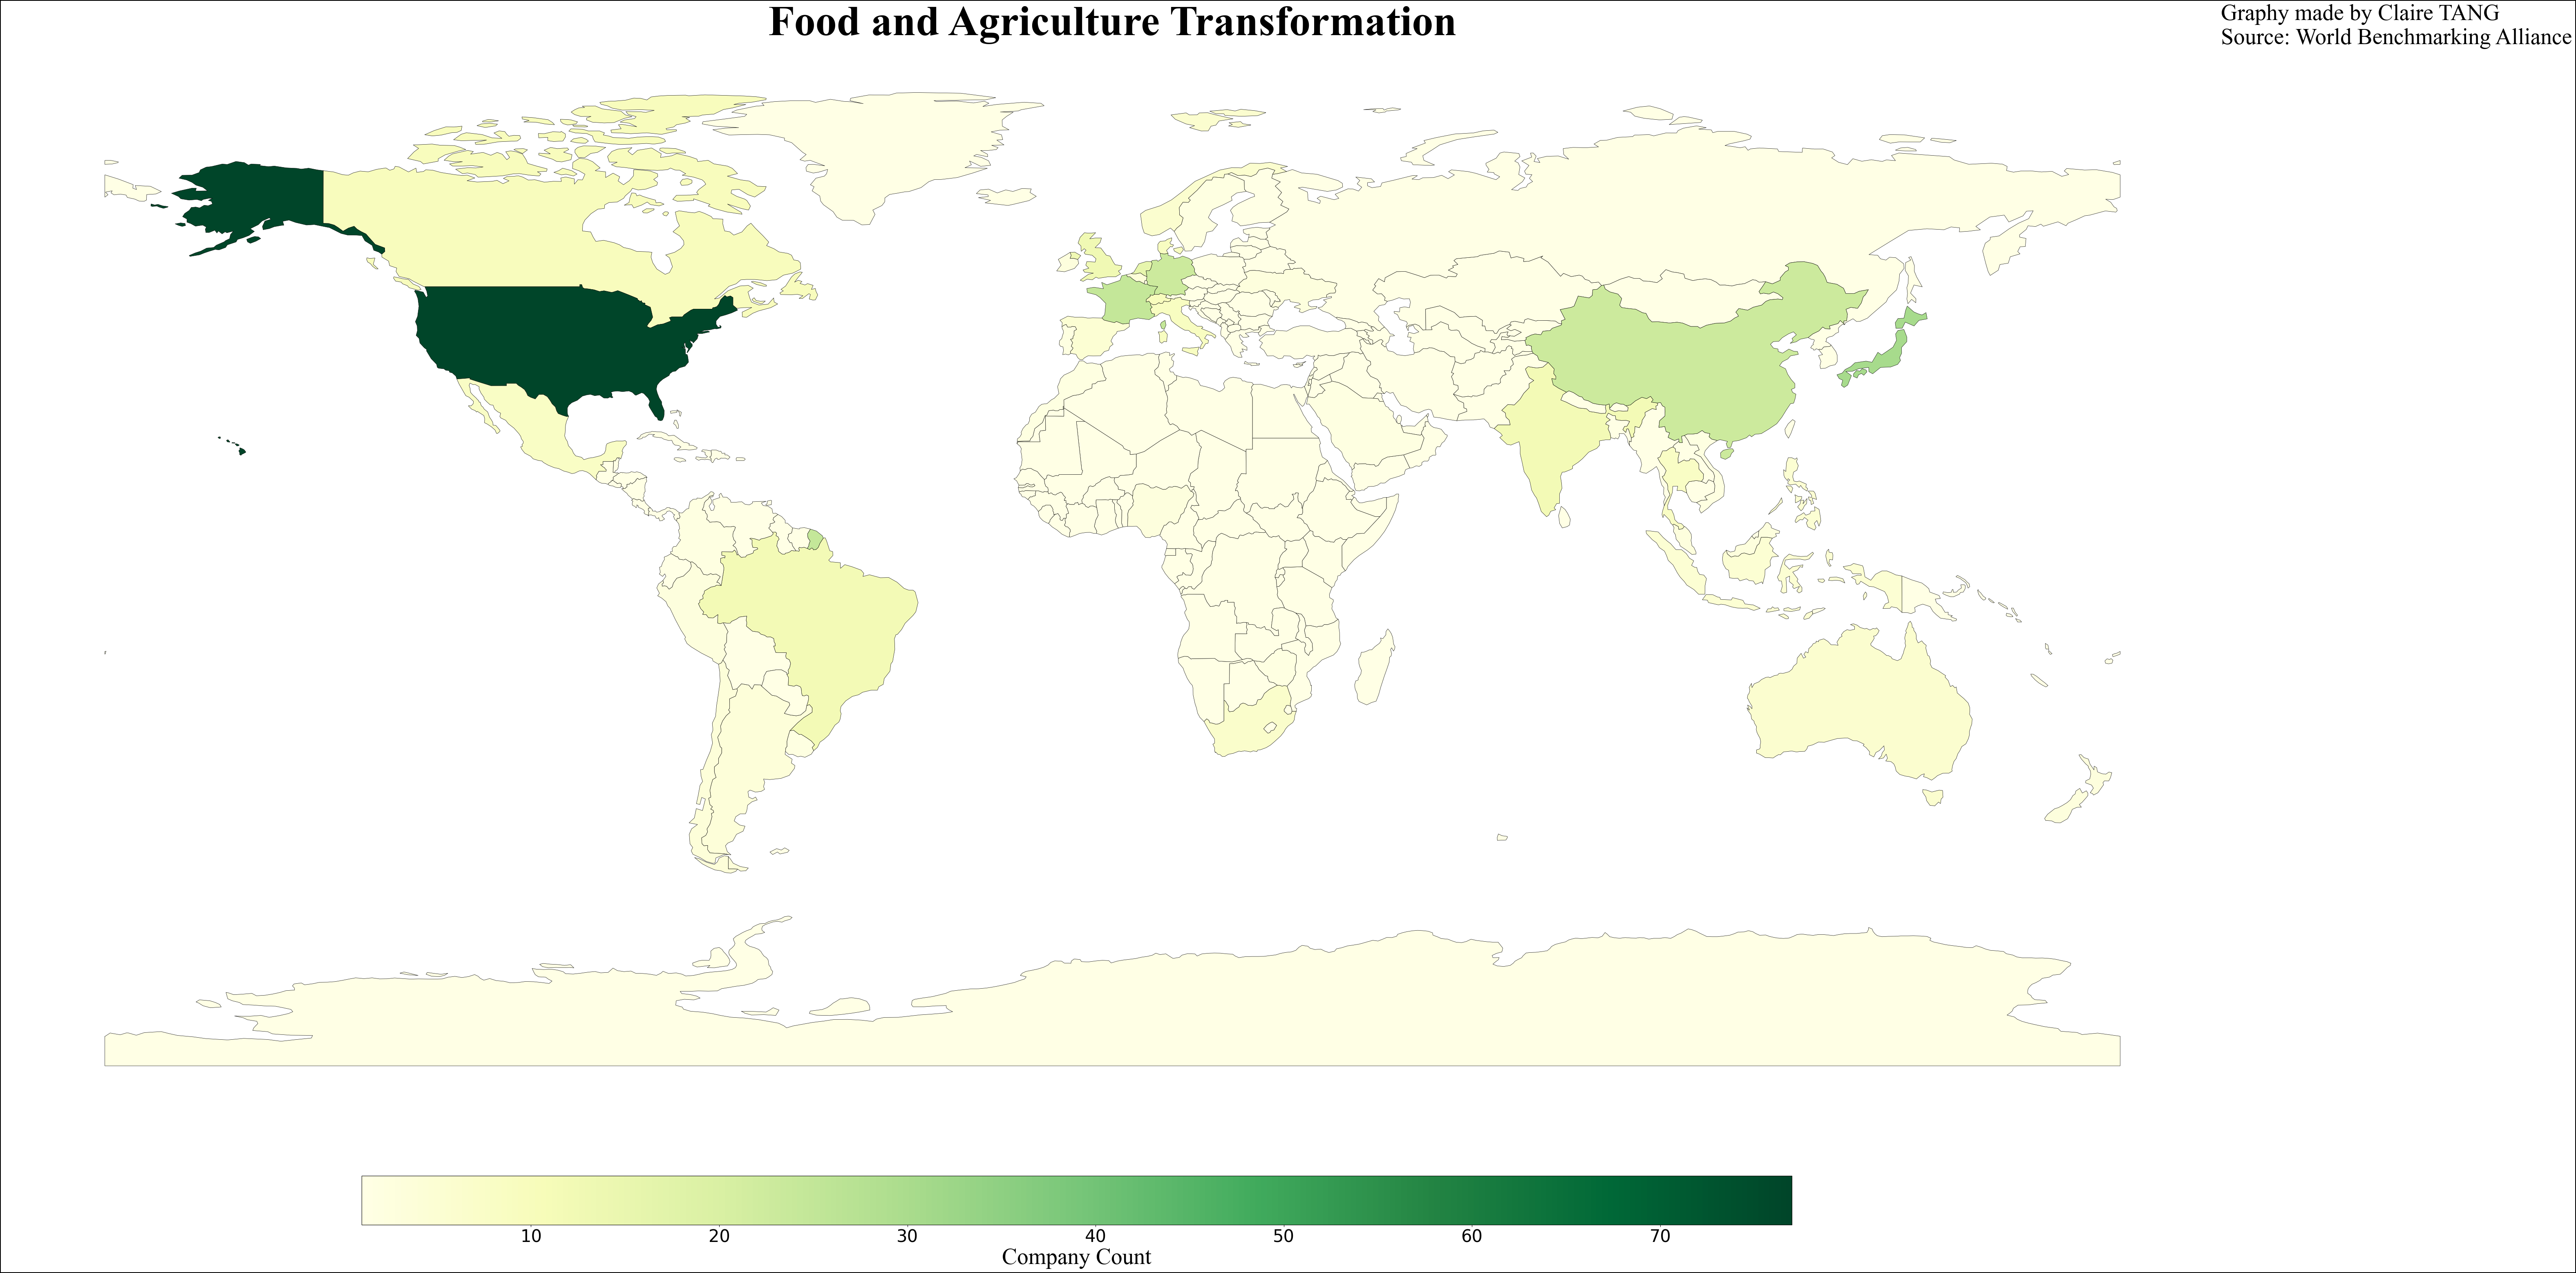

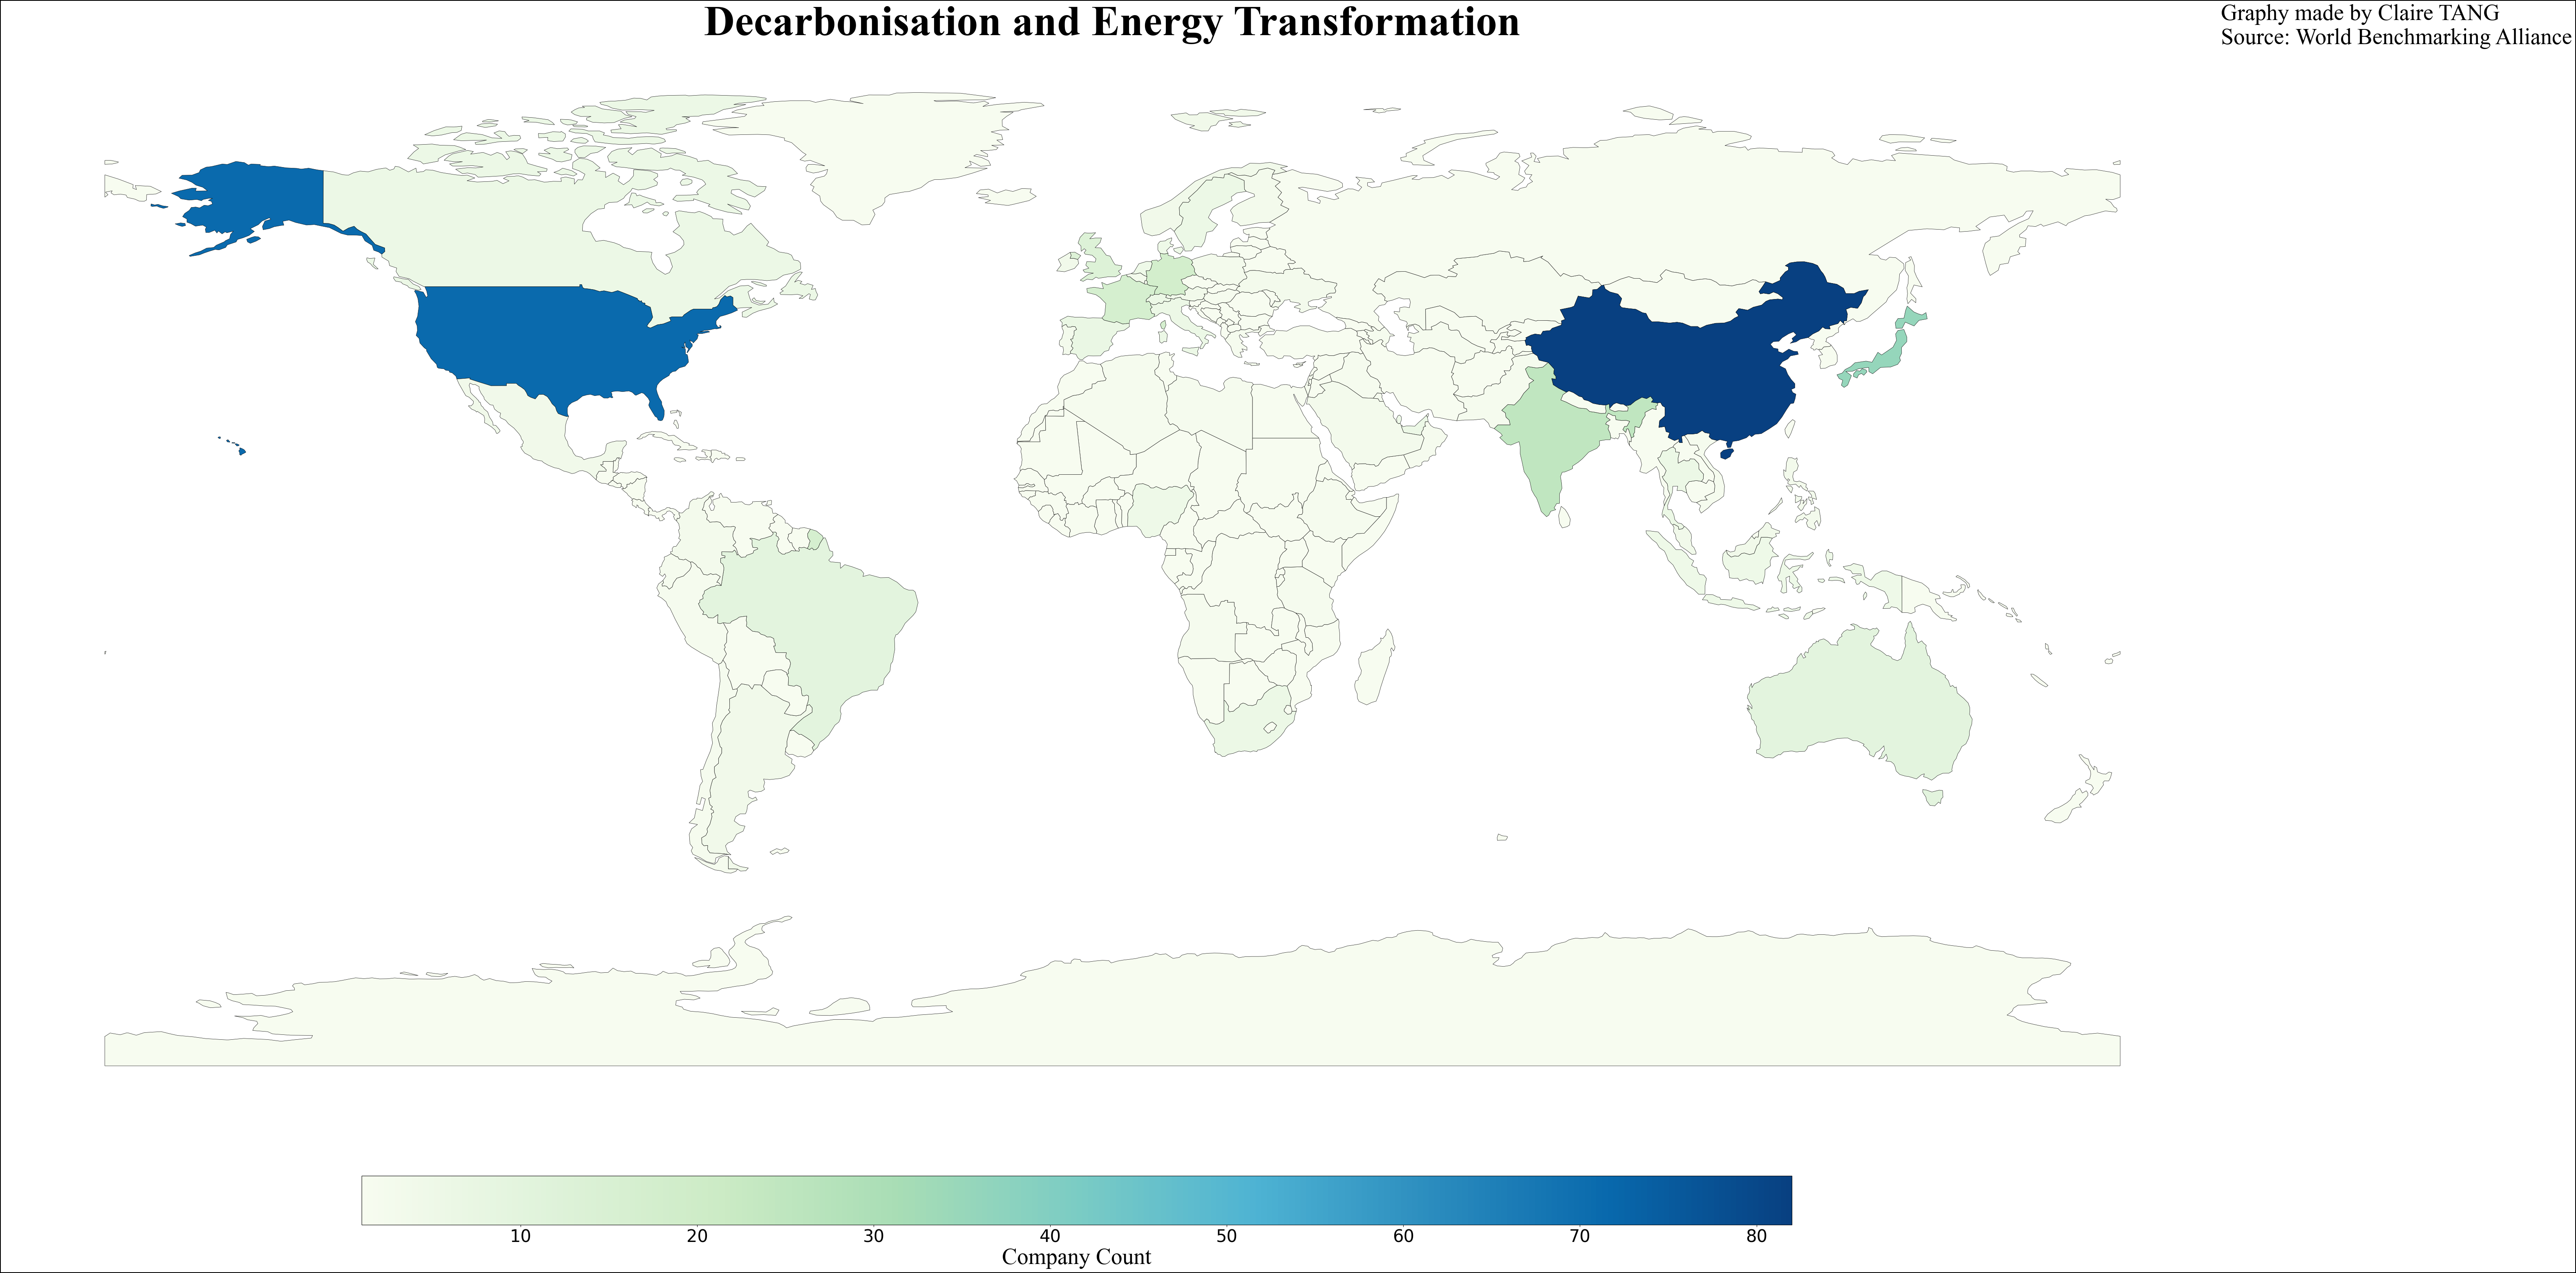

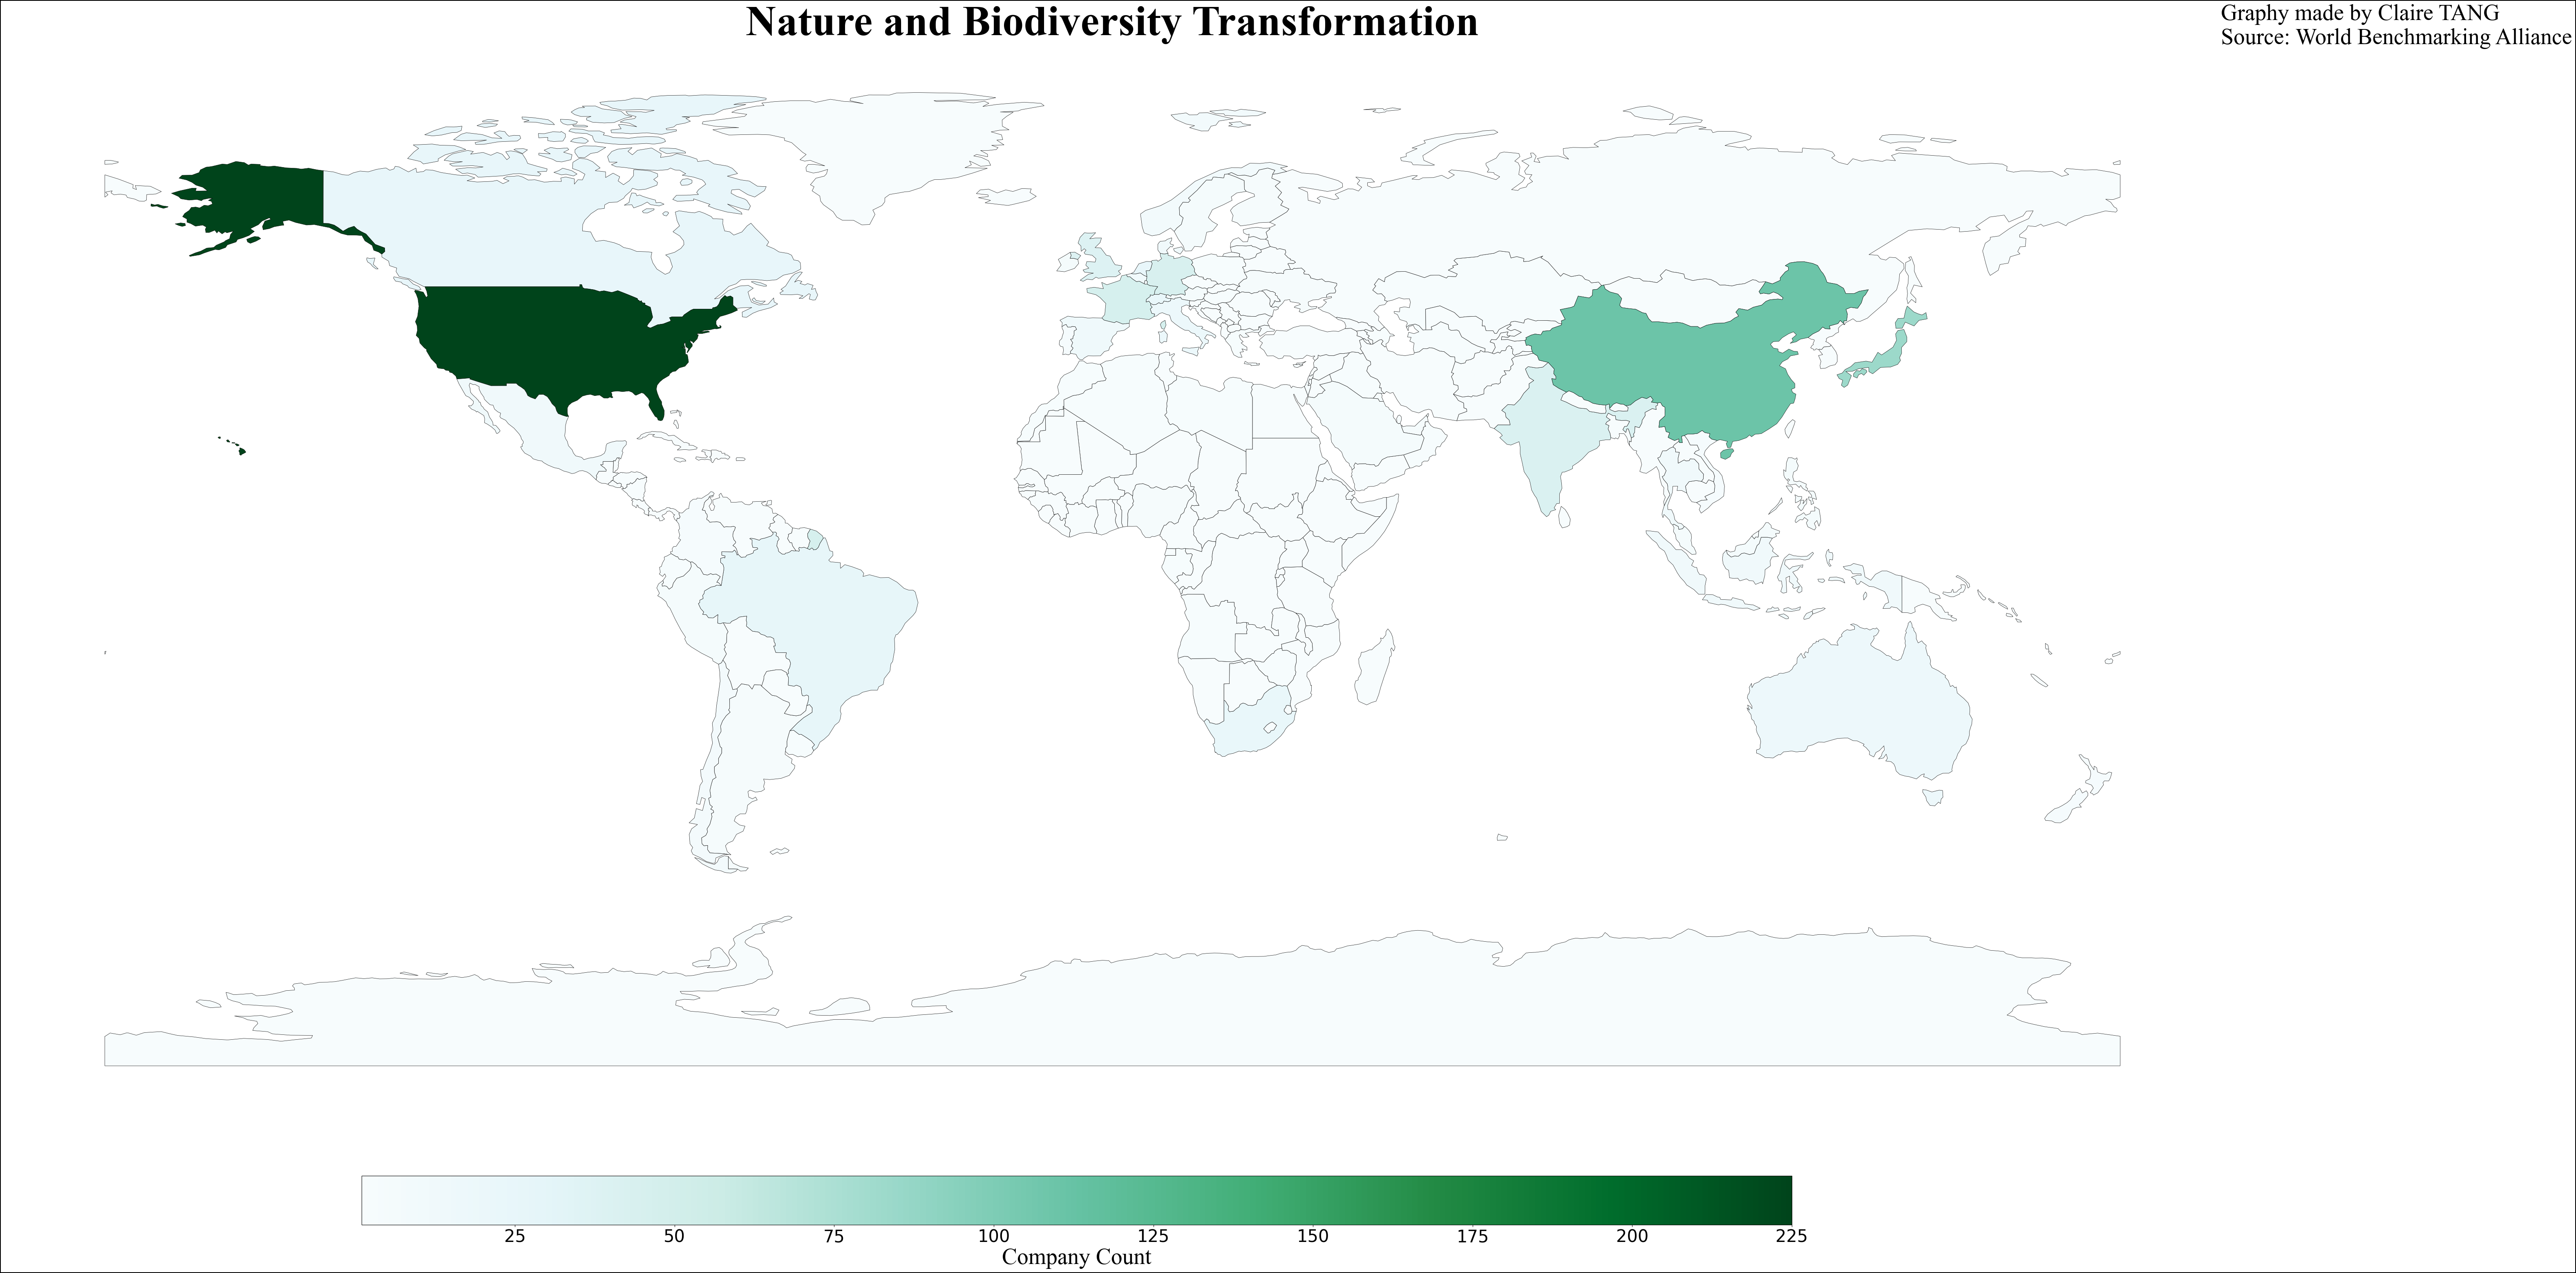

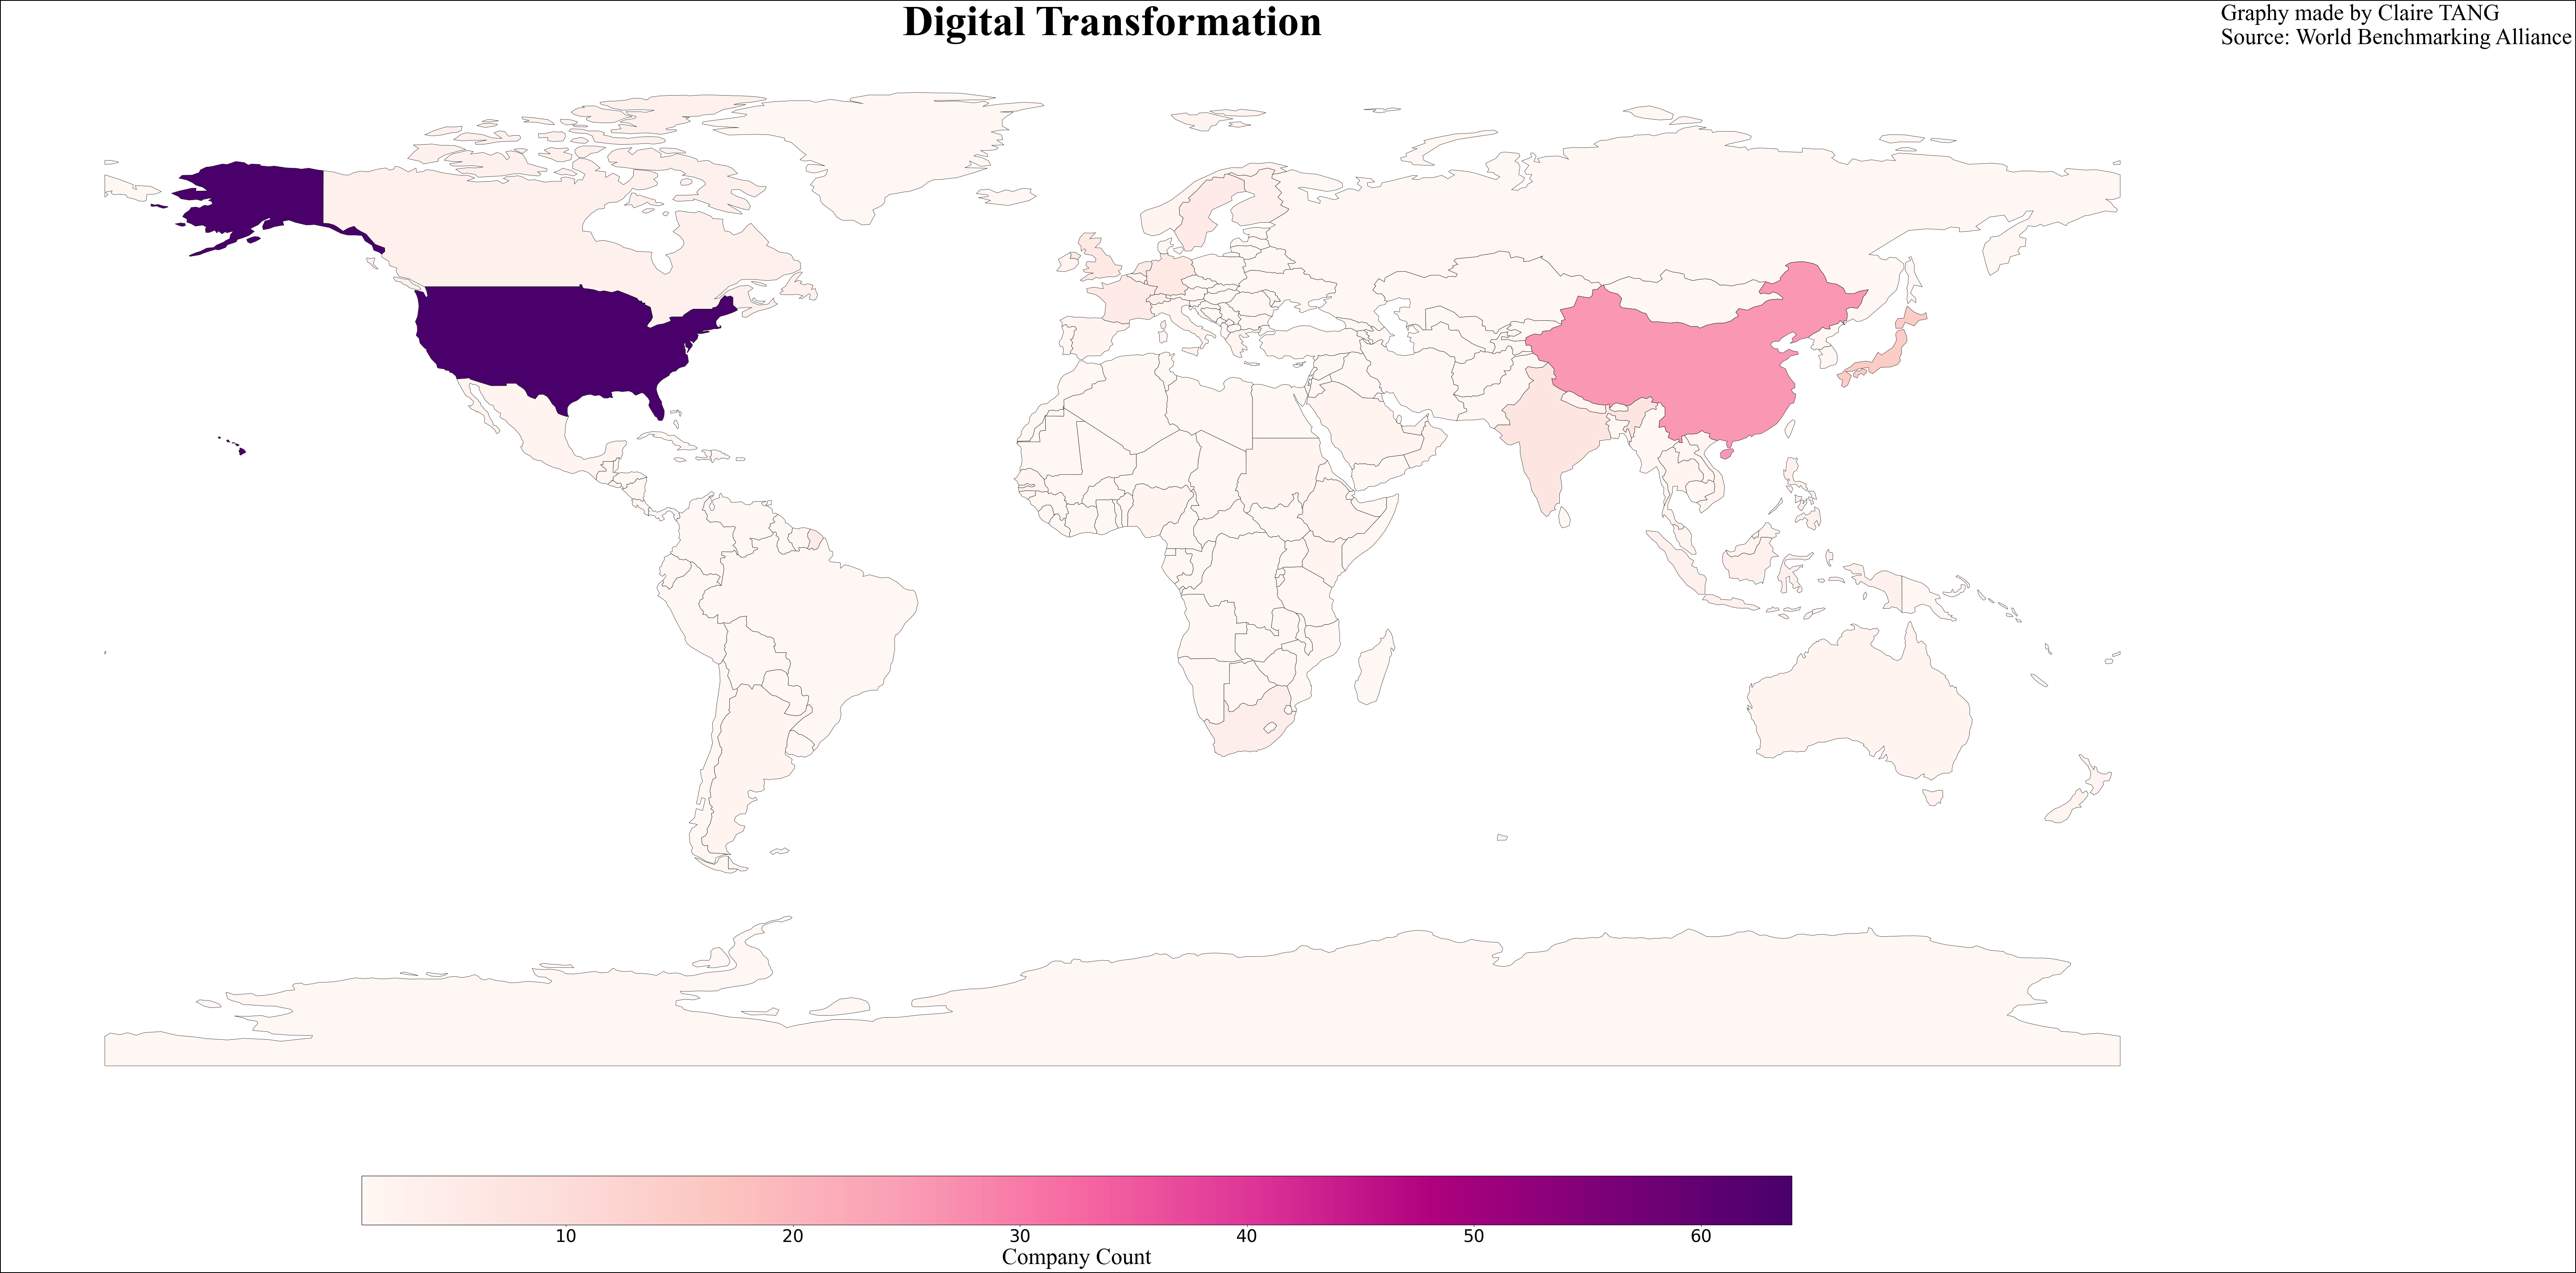

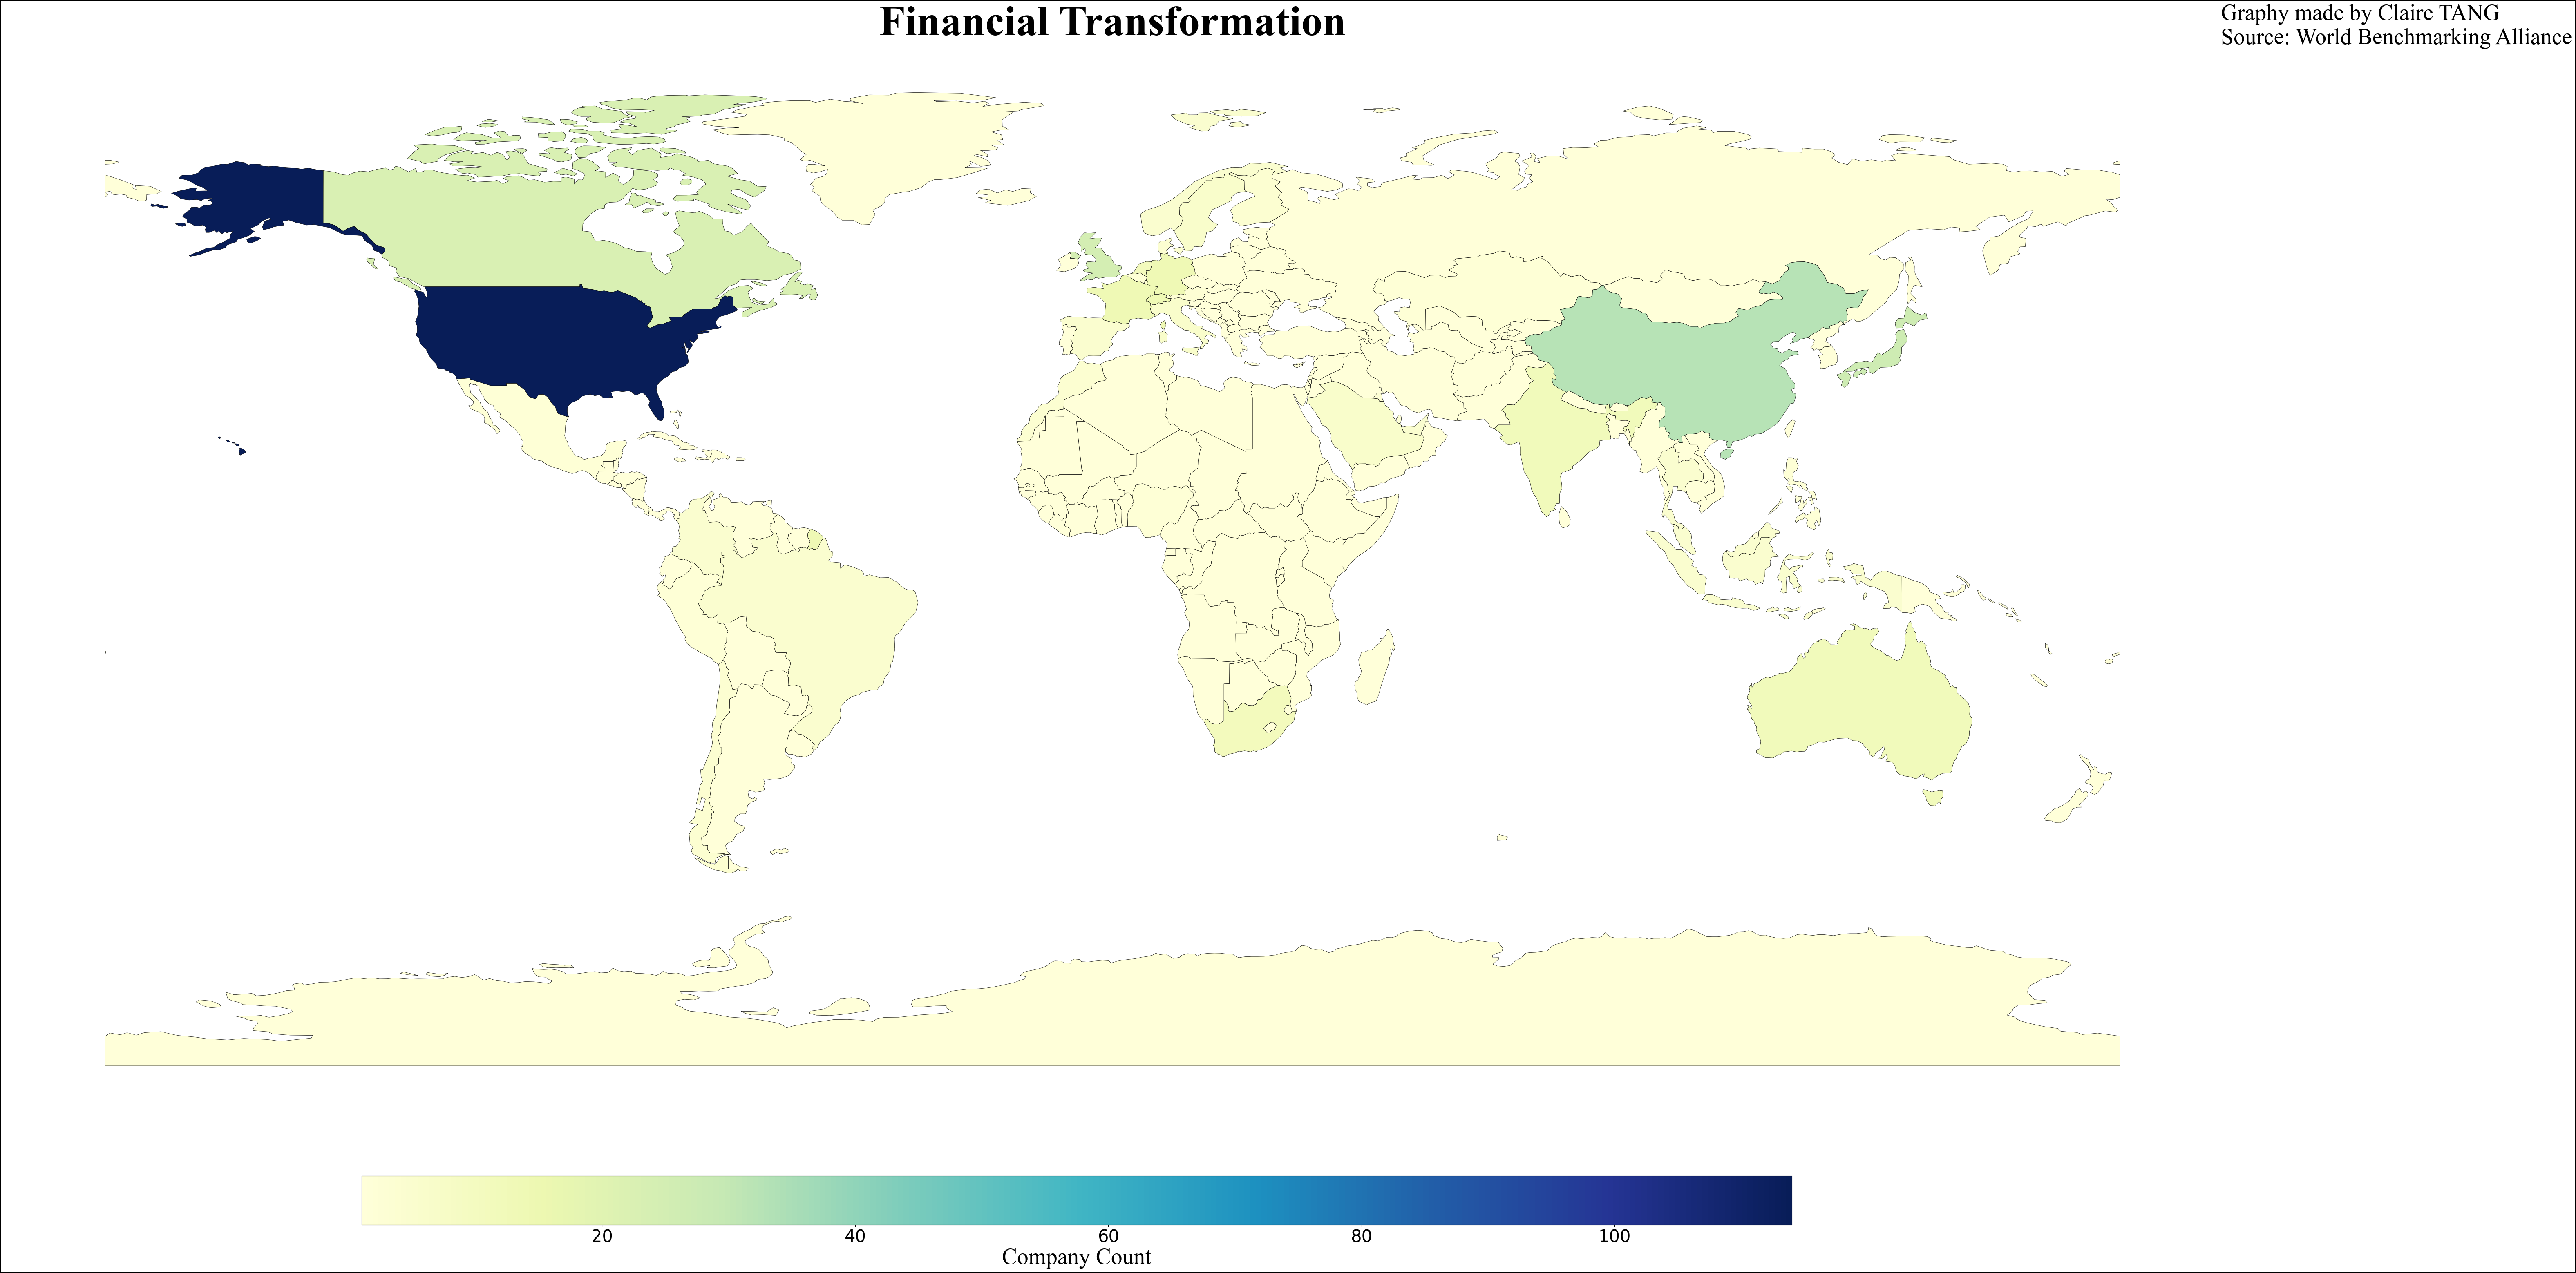

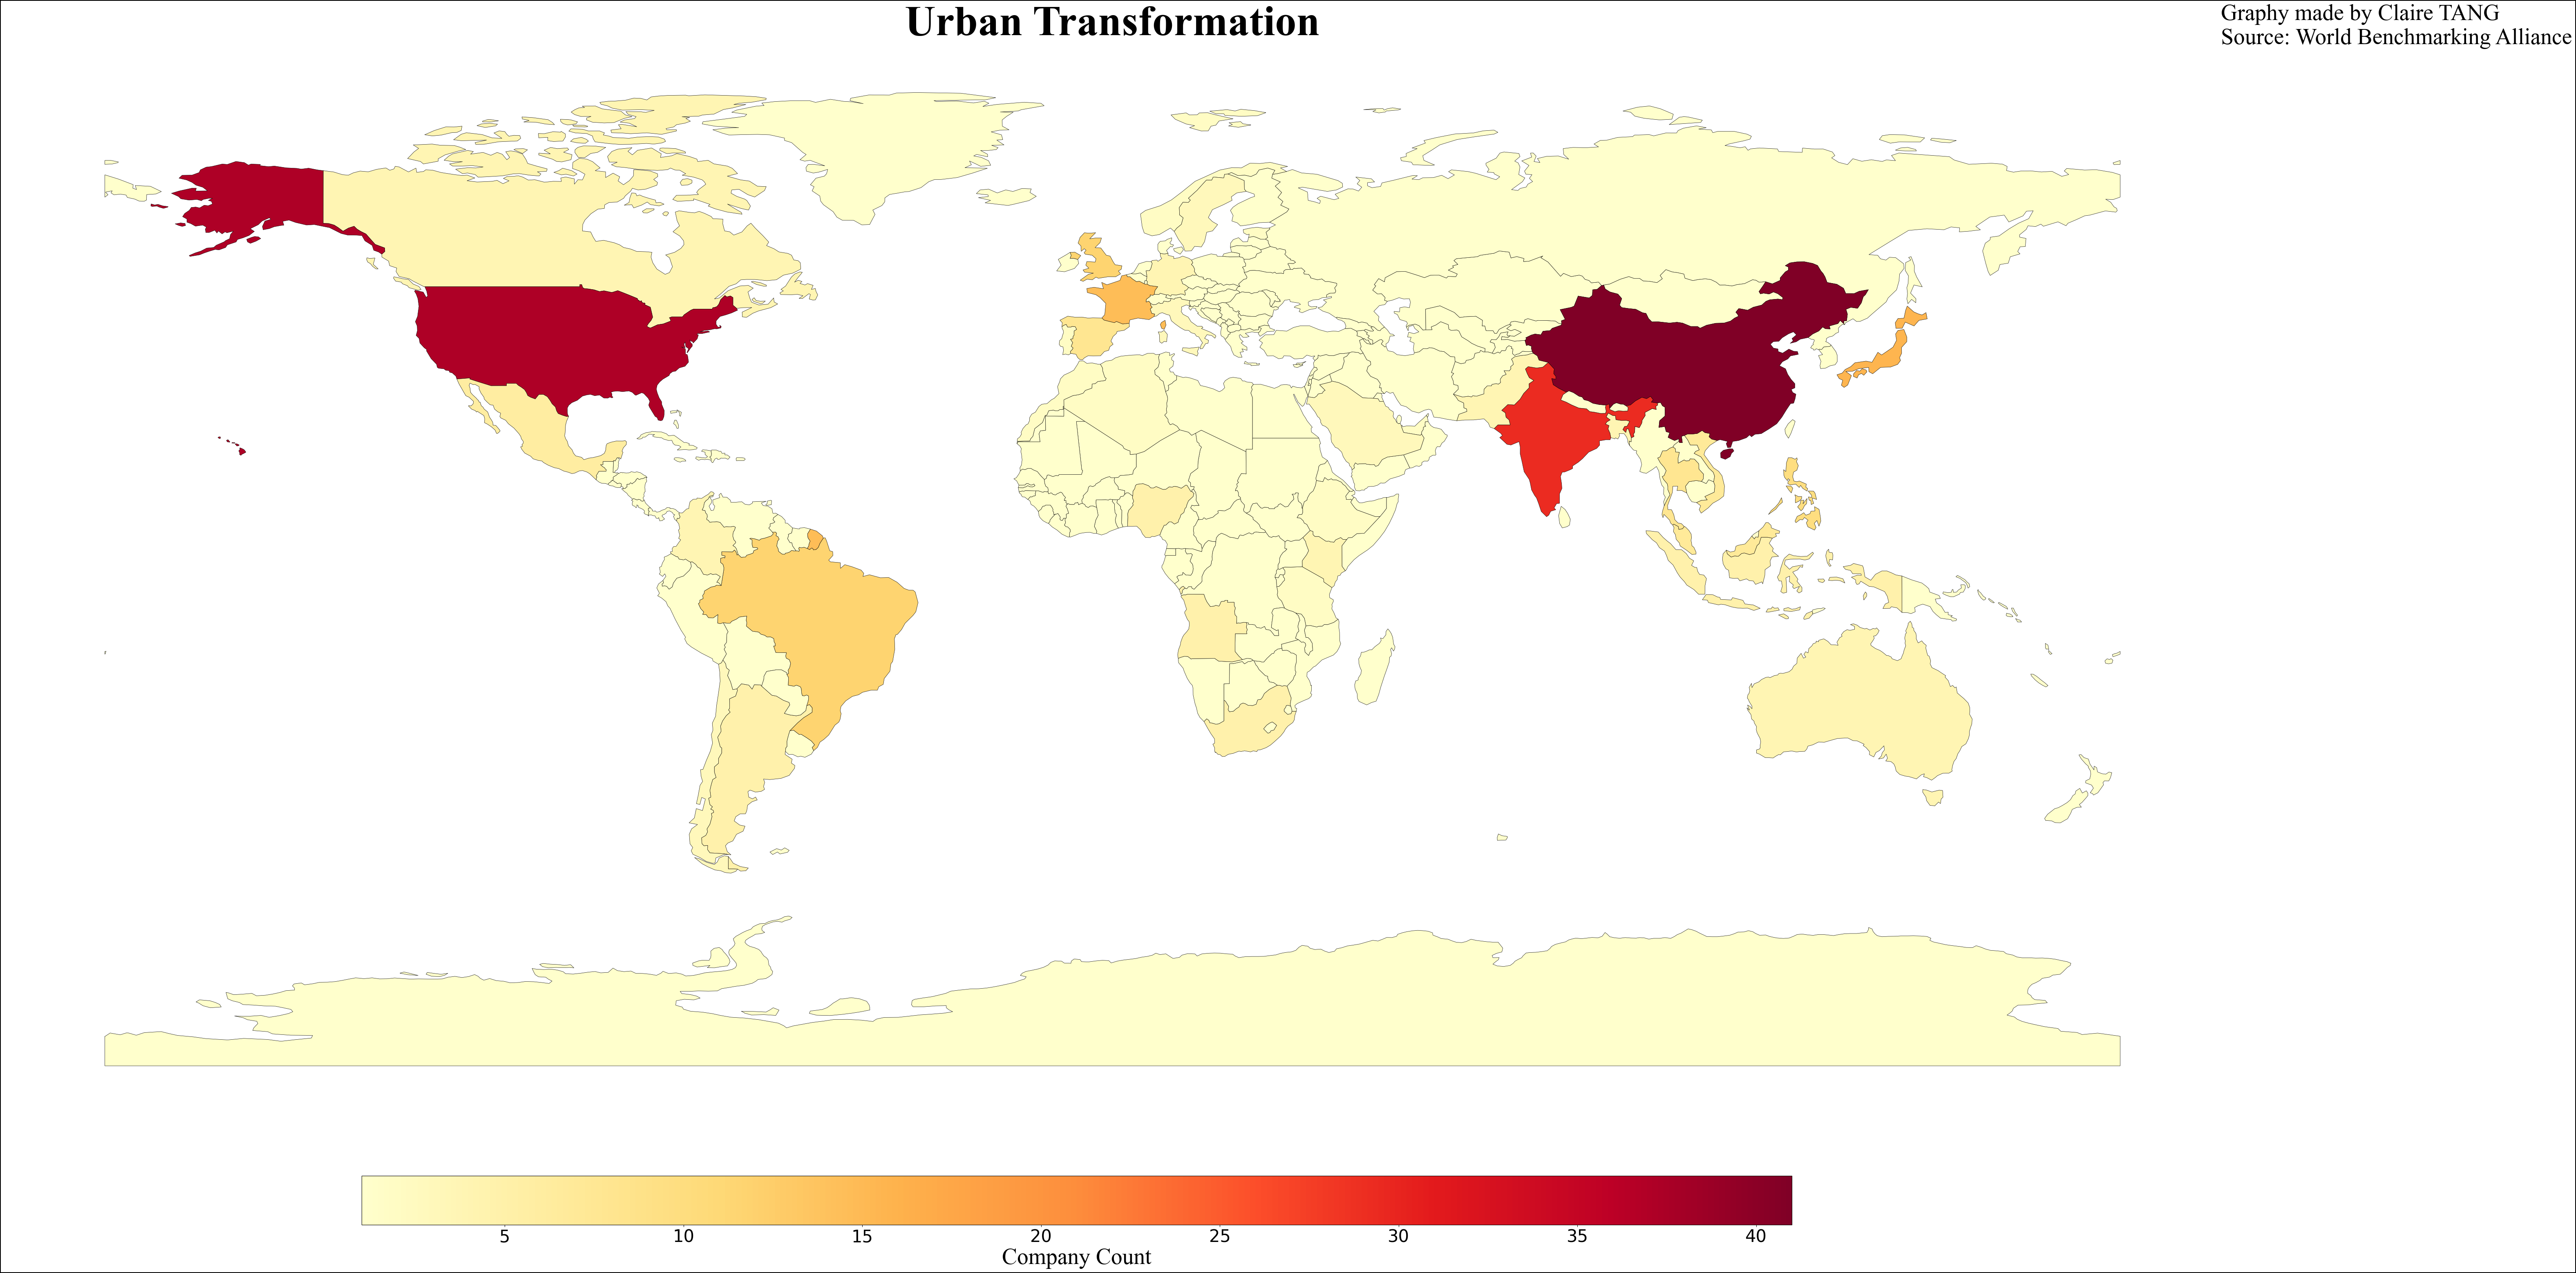

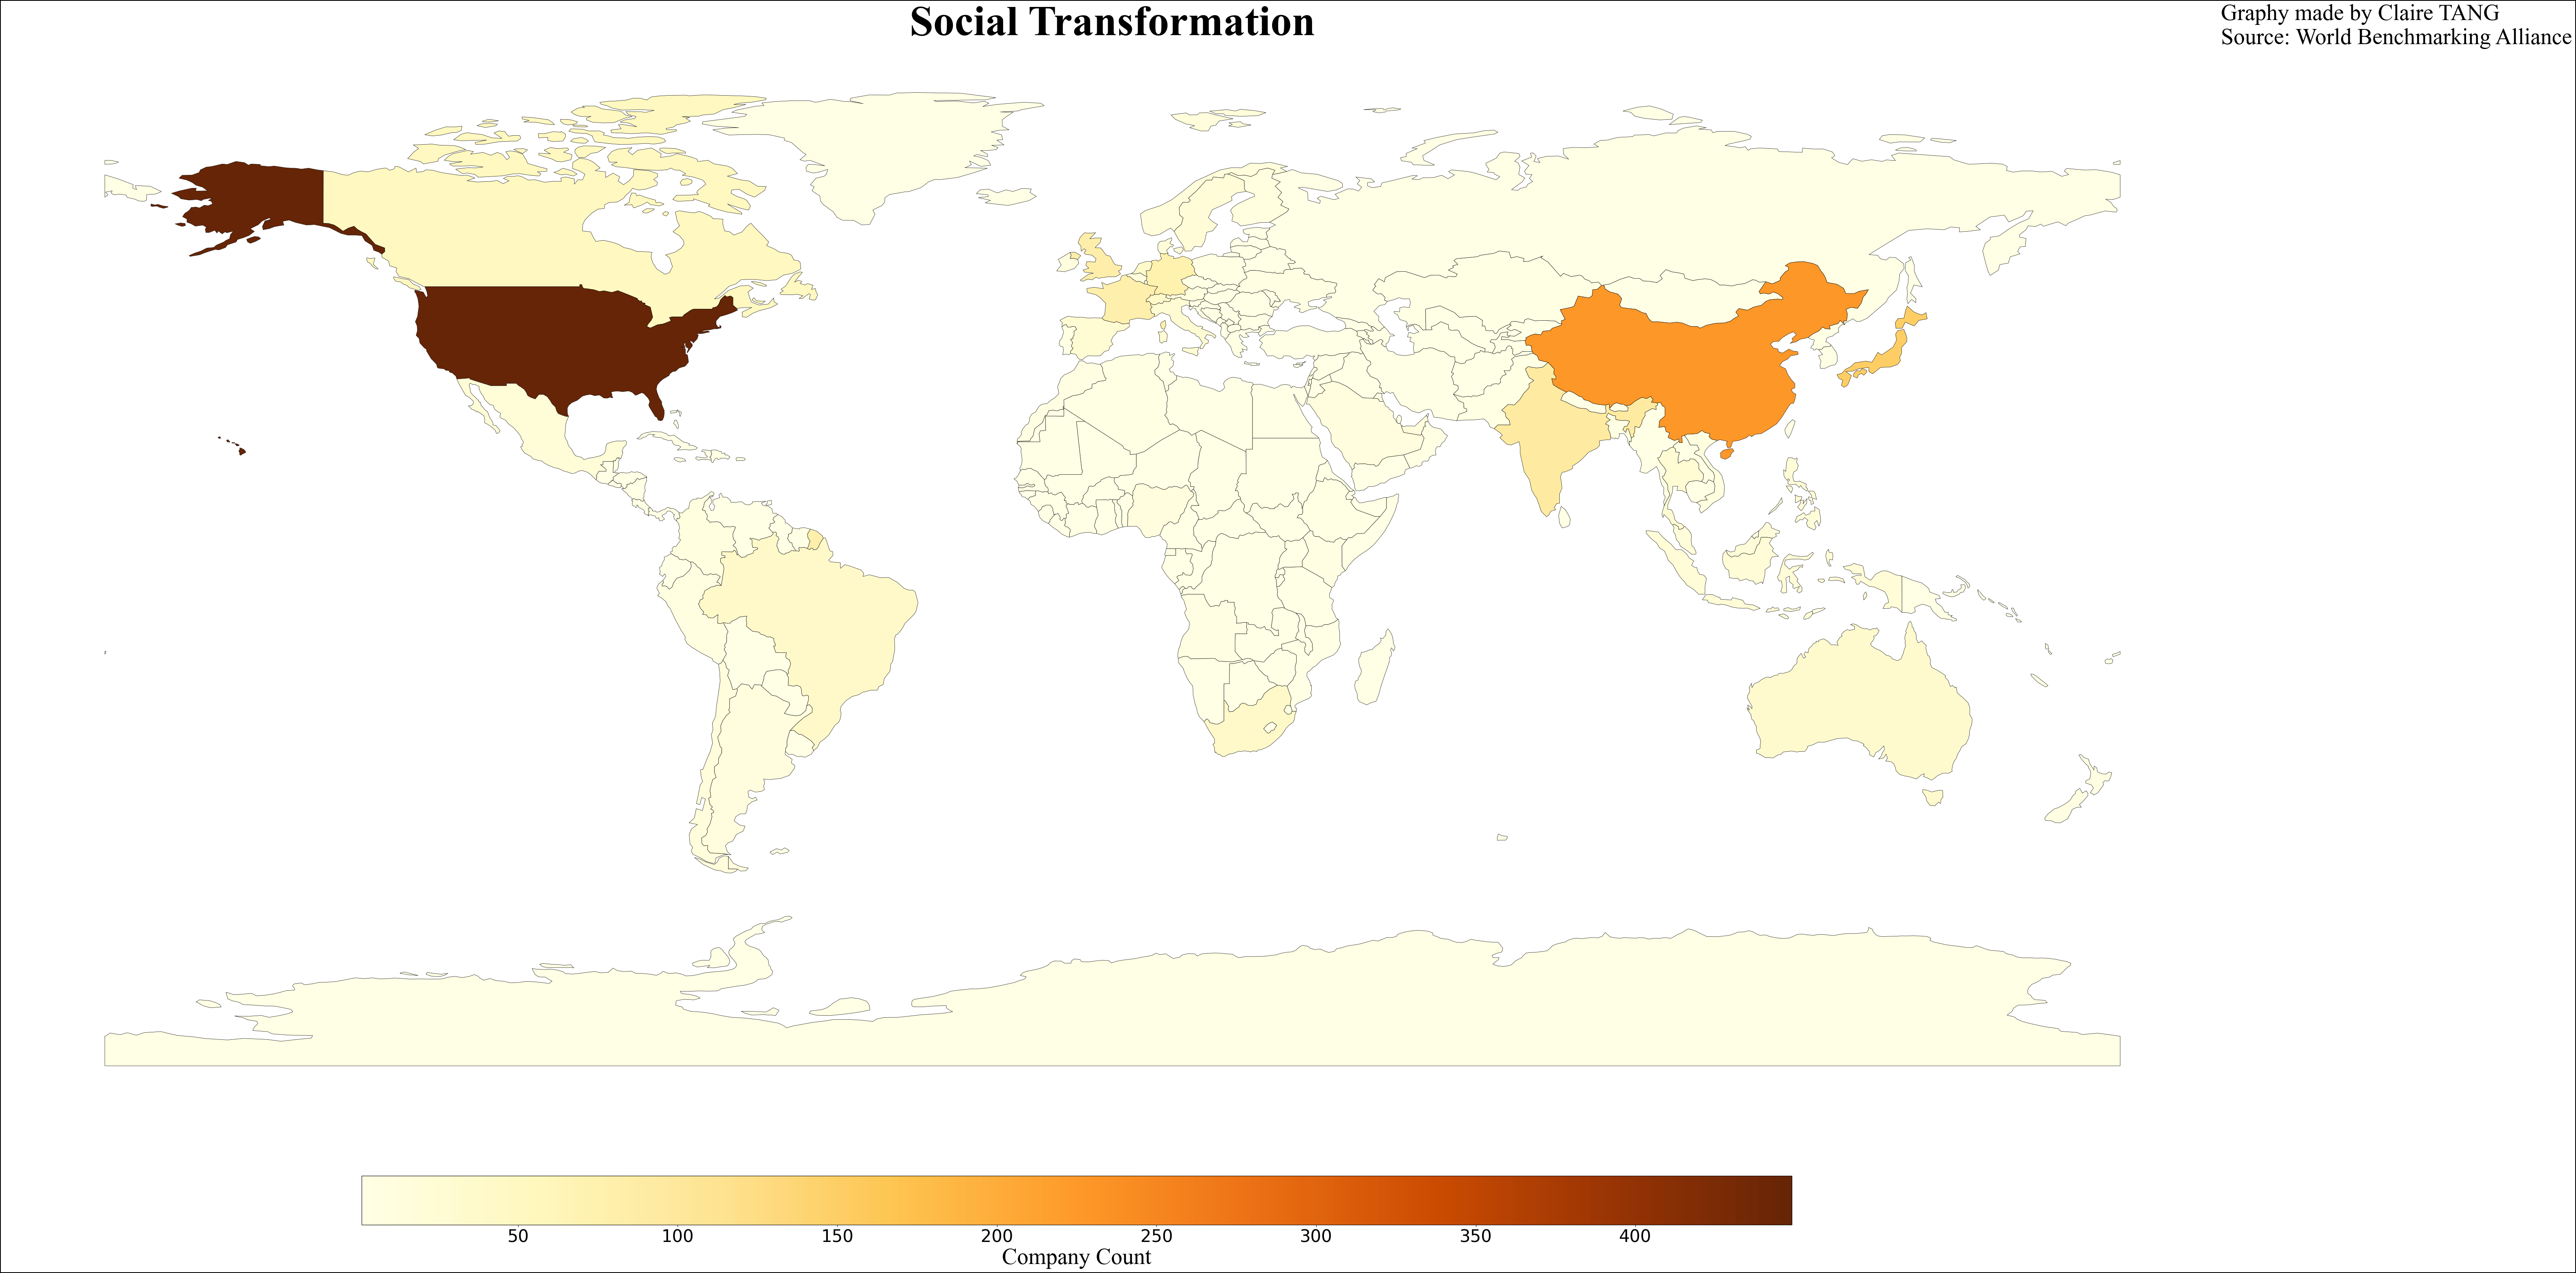

In [99]:
for i in column_dict:
    df_section = df[df[i[0]] == 'Yes'].loc[:,["Headquarters"]]
    gdf_section_companies = merge_world_companies_df(df_section, world)
    plot_map(gdf_section_companies, path, i[0], i[1])